#### Importing the dependencies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

#### Data Collection and Preprocessing

In [4]:
# Loading the data to a Pandas DataFrame
house_price_data = pd.read_csv("../Datasets/Boston House Price Data.csv")

In [5]:
# first 5 rows of the data
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# number of rows and columns in the dataset
house_price_data.shape

(506, 14)

In [7]:
# check for missing values
house_price_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
# statistical measures of the data
house_price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Understanding the Correlation between various features in the dataset

In [11]:
correlation = house_price_data.corr()

<Axes: >

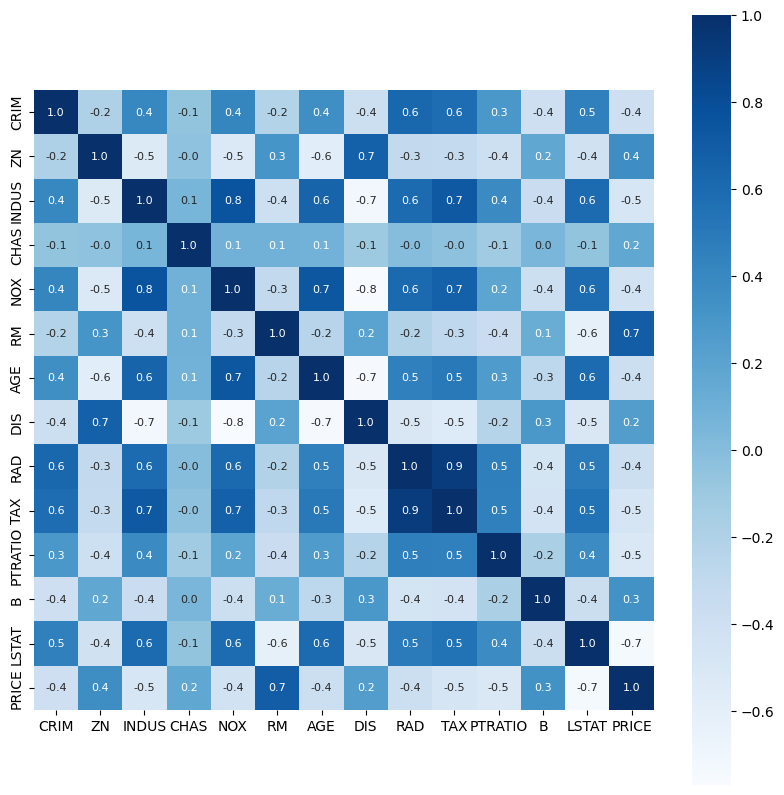

In [14]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='0.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
# separating features and target
X = house_price_data.drop(columns='PRICE', axis=1)
Y = house_price_data['PRICE']

#### Train Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


#### Data Standardization

In [18]:
scaler = StandardScaler()

In [19]:
X_train_standardized = scaler.fit_transform(X_train)

In [20]:
X_test_standardized = scaler.transform(X_test)

In [21]:
print(X_train_standardized.std(), X_test_standardized.std())

1.0 1.0326187959666866


#### Model Training

- XGBoost Regressor

In [24]:
model = XGBRegressor()

In [26]:
# Train the XG Boost Regressor with training data
model.fit(X_train_standardized, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Model Evaluation

##### Prediction on training data

In [27]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train_standardized)

In [28]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error :", score_1)
print("Mean Absolute Error :", score_2)

R squared error : 0.9999980039471451
Mean Absolute Error : 0.0091330346494618


Visualizing the Actual prices and Predicted Prices

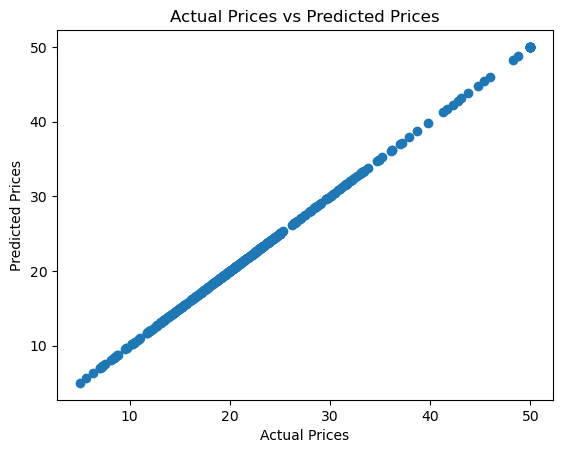

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

##### Prediction on test data

In [30]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test_standardized)

In [31]:
# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error :", score_3)
print("Mean Absolute Error :", score_4)

R squared error : 0.9051721149855378
Mean Absolute Error : 2.0748727686264927
